In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

import sys
from pathlib import Path
module_path = Path.cwd().parent / 'utils'
sys.path.append(str(module_path))
from simulations import *
import visualization

In [2]:
current_path = os.getcwd()  # Get current working directory
parent_path = os.path.dirname(current_path)
folder_path = parent_path + '/dataset/Simulations_aug_indep_trainfull/'  # change to your folder path
file_names = os.listdir(folder_path)
results_trainfull_1 = []
results_trainfull_2 = []
results_trainfull_3 = []
results_logrank = []
# Display the file names
for name in file_names:
    if 'results_survival_km_distance' in name:
        print(name)
        results_trainfull_1.append(pd.read_csv(folder_path + name,index_col=0))
    elif 'results_2_survival_km_distance' in name:
        print(name)
        results_trainfull_2.append(pd.read_csv(folder_path + name,index_col=0))
    elif 'results_3_survival_km_distance' in name:
        print(name)
        results_trainfull_3.append(pd.read_csv(folder_path + name,index_col=0))
results_trainfull_1 = pd.concat(results_trainfull_1)
results_trainfull_1 = results_trainfull_1.sort_values(by='XP_num')
results_trainfull_2 = pd.concat(results_trainfull_2)
results_trainfull_2 = results_trainfull_2.sort_values(by='XP_num')
results_trainfull_3 = pd.concat(results_trainfull_3)
results_trainfull_3 = results_trainfull_3.sort_values(by='XP_num')

results_survival_km_distance_n_samples_600_n_features_bytype_6_MC_12to22.csv
results_survival_km_distance_n_samples_600_n_features_bytype_6_MC_45to55.csv
results_survival_km_distance_n_samples_600_n_features_bytype_6_MC_67to77.csv
results_2_survival_km_distance_n_samples_600_n_features_bytype_6_MC_56to66.csv
results_2_survival_km_distance_n_samples_600_n_features_bytype_6_MC_23to33.csv
results_2_survival_km_distance_n_samples_600_n_features_bytype_6_MC_78to88.csv
results_3_survival_km_distance_n_samples_600_n_features_bytype_6_MC_56to66.csv
results_3_survival_km_distance_n_samples_600_n_features_bytype_6_MC_78to88.csv
results_3_survival_km_distance_n_samples_600_n_features_bytype_6_MC_23to33.csv
results_survival_km_distance_n_samples_600_n_features_bytype_6_MC_34to44.csv
results_survival_km_distance_n_samples_600_n_features_bytype_6_MC_1to11.csv
results_survival_km_distance_n_samples_600_n_features_bytype_6_MC_89to99.csv
results_2_survival_km_distance_n_samples_600_n_features_bytype_6_

In [ ]:
generators_sel = ["HI-VAE_weibull", "HI-VAE_piecewise", "Surv-GAN", "Surv-VAE", "HI-VAE_weibull_prior", 
                  "HI-VAE_piecewise_prior"]

In [4]:
treat_effects_trainfull_1 = np.unique(results_trainfull_1.H0_coef.values)
treat_effects_trainfull_2 = np.unique(results_trainfull_2.H0_coef.values)
treat_effects_trainfull_3 = np.unique(results_trainfull_3.H0_coef.values)
aug_percs = np.unique(results_trainfull_1.aug_perc.values)
for col in results_trainfull_1.columns:
    results_trainfull_1[col] = np.float64(results_trainfull_1[col].values)
print(f"treat_effects_trainfull_1: {treat_effects_trainfull_1}")
print(f"treat_effects_trainfull_2: {treat_effects_trainfull_2}")
print(f"treat_effects_trainfull_3: {treat_effects_trainfull_3}")
print(f"aug_percs: {aug_percs}")

treat_effects_trainfull_1: [0.  0.4]
treat_effects_trainfull_2: [0.2 0.6]
treat_effects_trainfull_3: [0.8 1. ]
aug_percs: [0.33333333 0.66666667 1.        ]


In [6]:
results_trainfull_2["XP_num"] = results_trainfull_2.XP_num + results_trainfull_1.XP_num.max() + 1
results_trainfull_3["XP_num"] = results_trainfull_3.XP_num + results_trainfull_2.XP_num.max() + 1
results_trainfull = pd.concat([results_trainfull_1, results_trainfull_2, results_trainfull_3])
results_trainfull = results_trainfull.sort_values(by='H0_coef')
treat_effects_trainfull = np.unique(results_trainfull.H0_coef.values)

In [7]:
results_trainfull

,XP_num,D_control,D_treated,H0_coef_univ,H0_coef,aug_perc,log_pvalue_init,est_cox_coef_init,est_cox_coef_se_init,log_pvalue_HI-VAE_weibull,...,log_pvalue_HI-VAE_piecewise_prior,log_pvalue_control_HI-VAE_piecewise_prior,est_cox_coef_HI-VAE_piecewise_prior,est_cox_coef_se_HI-VAE_piecewise_prior,J-S distance_HI-VAE_piecewise_prior,KS test_HI-VAE_piecewise_prior,Survival curves distance_HI-VAE_piecewise_prior,Detection XGB_HI-VAE_piecewise_prior,NNDR_HI-VAE_piecewise_prior,K-map score_HI-VAE_piecewise_prior
0,0.0,232.676471,250.0,0.003427,0.0,0.333333,0.868377,0.103605,0.128431,6.341500,...,8.115742,2.530955,0.330962,0.091912,0.010368,0.915033,0.098015,0.654500,0.387029,3.0
129,330.0,262.285714,256.0,0.003427,0.0,0.333333,0.072887,-0.011096,0.126081,8.343220,...,4.031538,2.745474,0.213688,0.090296,0.009861,0.919048,0.083245,0.555868,0.433944,12.0
128,330.0,262.285714,256.0,0.003427,0.0,0.333333,0.072887,-0.011096,0.126081,6.847023,...,2.547661,1.972182,0.157148,0.089334,0.011624,0.925170,0.101457,0.609263,0.396377,4.0
127,330.0,262.285714,256.0,0.003427,0.0,0.333333,0.072887,-0.011096,0.126081,10.511824,...,5.484942,3.639351,0.259481,0.090759,0.009785,0.929252,0.073358,0.597974,0.482574,8.0
126,330.0,262.285714,256.0,0.003427,0.0,0.333333,0.072887,-0.011096,0.126081,9.274829,...,4.714669,3.257538,0.234660,0.089987,0.015074,0.896599,0.061985,0.557553,0.411908,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13066,1451.0,253.959184,215.0,-0.576778,1.0,1.000000,16.890049,-0.507928,0.093915,3.496218,...,3.410790,6.506063,-0.200447,0.094179,0.007816,0.946259,0.056099,0.635197,0.414254,5.0
13065,1451.0,253.959184,215.0,-0.576778,1.0,1.000000,16.890049,-0.507928,0.093915,1.626636,...,5.171417,4.171480,-0.257688,0.093421,0.006273,0.955782,0.036034,0.662334,0.380981,6.0
13070,1451.0,253.959184,215.0,-0.576778,1.0,1.000000,16.890049,-0.507928,0.093915,4.085994,...,2.120670,9.175155,-0.146951,0.094588,0.006914,0.946939,0.062149,0.663195,0.438110,4.0
398,1453.0,264.421053,217.0,-0.576778,1.0,0.333333,13.242887,-0.621534,0.132134,1.639908,...,0.654442,12.741567,0.062157,0.096568,0.011746,0.917895,0.182168,0.572853,0.398195,3.0


# On all the generated datasets

### Train on control + treated

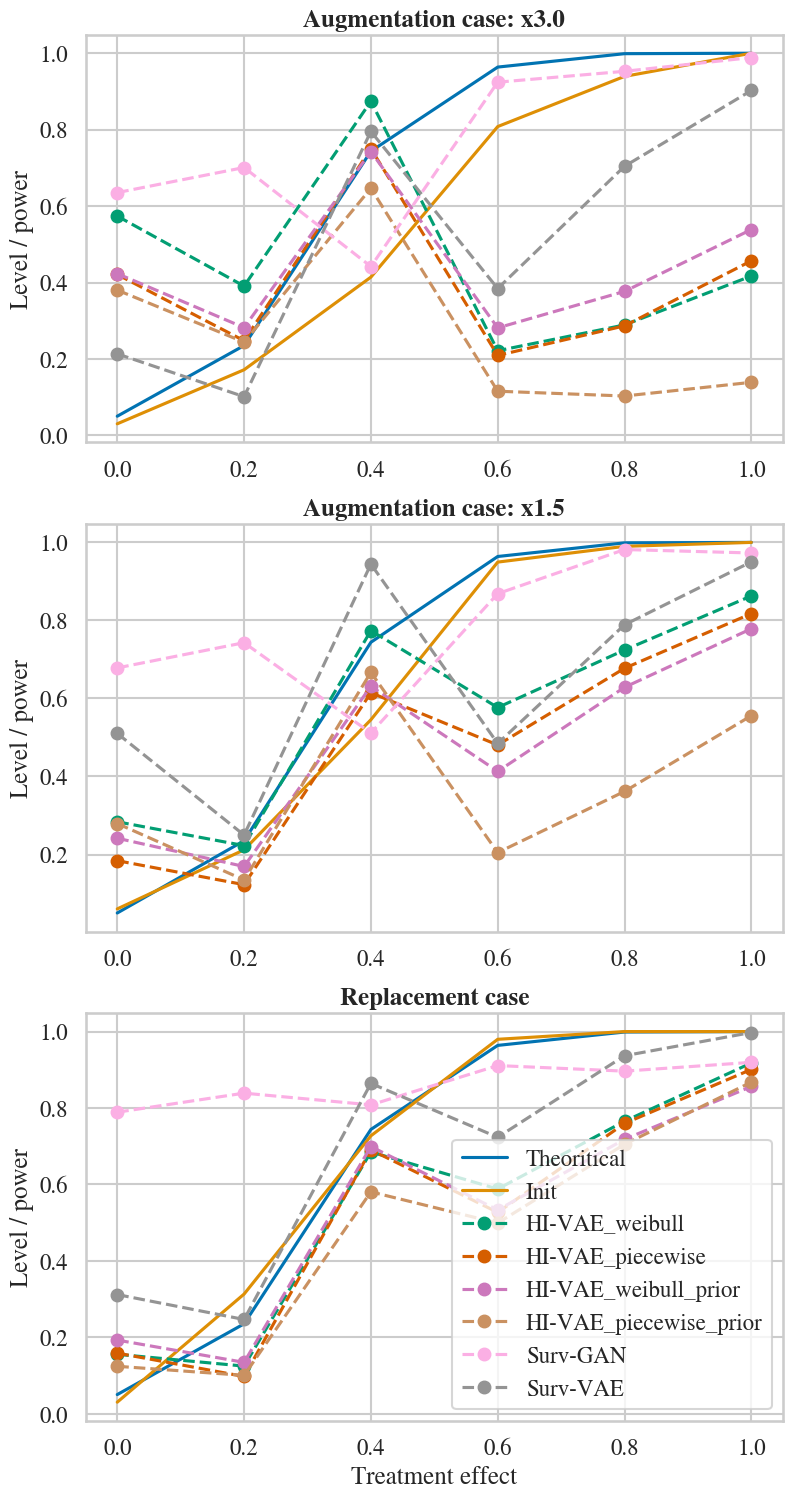

In [9]:
fig, axs = plt.subplots(len(aug_percs), 1, figsize=(9, 18))
for i, aug_perc in enumerate(aug_percs):
    results_ext_full = results_trainfull[results_trainfull.aug_perc == aug_perc].copy(deep=True)
    H0_coef_univ_theo = results_ext_full.groupby("H0_coef").mean()["H0_coef_univ"].to_numpy()
    D_control_theo = results_ext_full.groupby("H0_coef").mean()["D_control"].to_numpy()
    D_treated_theo = results_ext_full.groupby("H0_coef").mean()["D_treated"].to_numpy()
    power_theo = []
    for j in range(len(H0_coef_univ_theo)):
        power_theo.append(cpower(D_control_theo[j], D_treated_theo[j], H0_coef_univ_theo[j], 0.05))
    axs[i].plot(treat_effects_trainfull, np.array(power_theo), label = "Theoritical")

    results_ext_full["reject_H0_init"] = results_ext_full['log_pvalue_init'] > -np.log(0.05)
    power_init = results_ext_full.groupby("H0_coef").mean()["reject_H0_init"].to_numpy()
    axs[i].plot(treat_effects_trainfull, power_init, '-', label = "Init")

    custom_palette = ['deepskyblue', 'darkblue', 'orange', 'red']
    for generator_name in generators_sel:

        results_ext_full["reject_H0_gen_" + generator_name] = results_ext_full['log_pvalue_' + generator_name] > -np.log(0.05)
        power_gen = results_ext_full.groupby("H0_coef").mean()["reject_H0_gen_" + generator_name].to_numpy()
        axs[i].plot(treat_effects_trainfull, power_gen, '--', marker='o', label = generator_name,)
        # axs[i].scatter(treat_effects_trainfull, power_gen, marker='x', label=generator_name)

    axs[i].set_ylabel("Level / power")
    if i < len(aug_percs)-1:
        axs[i].set_title("Augmentation case: x{}".format(1/(aug_perc)), fontweight="semibold")
    else: 
        axs[i].set_title("Replacement case", fontweight="semibold")
    plt.legend()    
plt.xlabel("Treatment effect")
plt.show()

# Only on the best generated dataset

### Train on control + treated

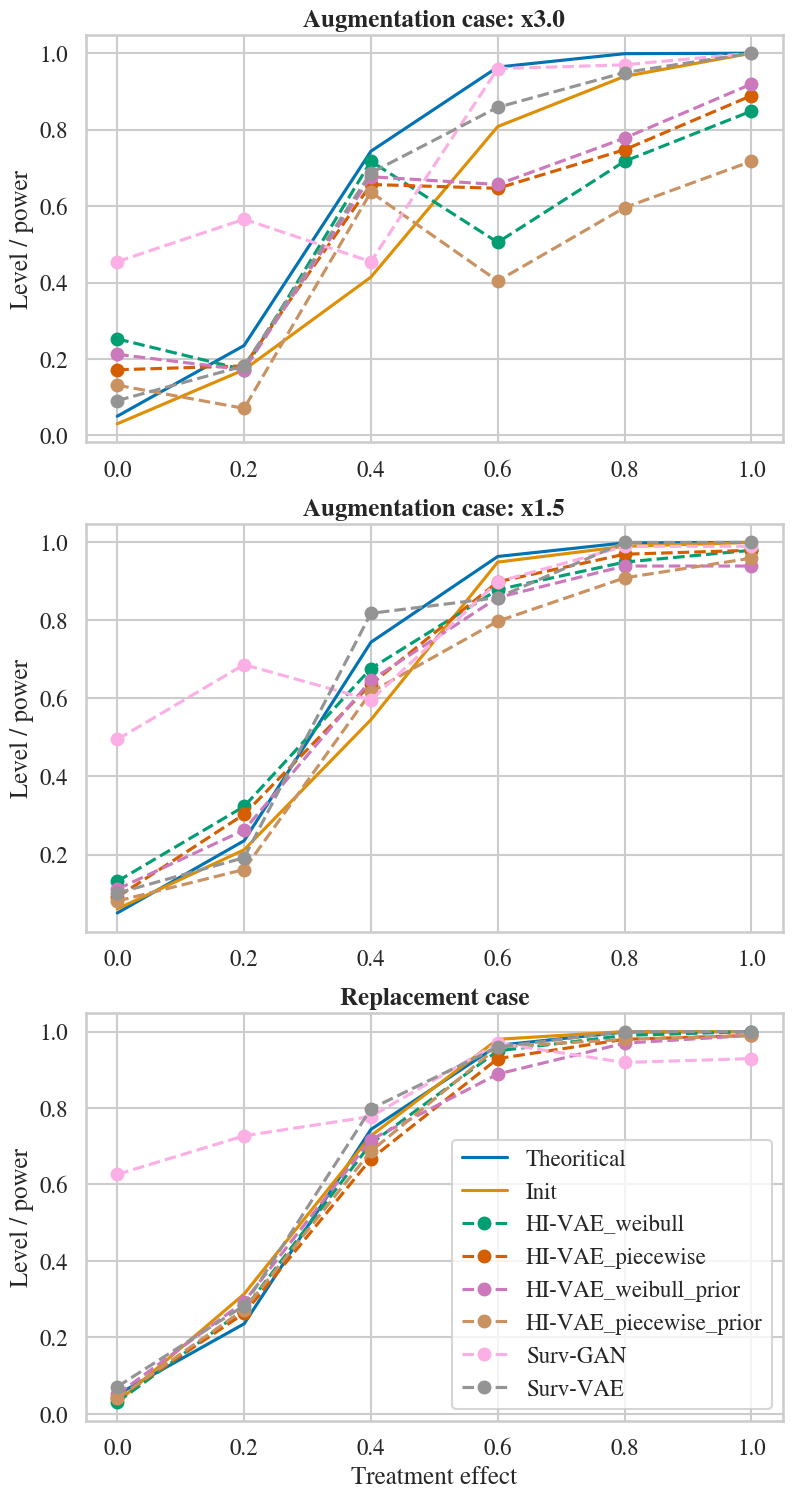

In [10]:
fig, axs = plt.subplots(len(aug_percs), 1, figsize=(9, 18))
for i, aug_perc in enumerate(aug_percs):
    results_ext_full = results_trainfull[results_trainfull.aug_perc == aug_perc].copy(deep=True)
    H0_coef_univ_theo = results_ext_full.groupby("H0_coef").mean()["H0_coef_univ"].to_numpy()
    D_control_theo = results_ext_full.groupby("H0_coef").mean()["D_control"].to_numpy()
    D_treated_theo = results_ext_full.groupby("H0_coef").mean()["D_treated"].to_numpy()
    power_theo = []
    for j in range(len(H0_coef_univ_theo)):
        power_theo.append(cpower(D_control_theo[j], D_treated_theo[j], H0_coef_univ_theo[j], 0.05))
    axs[i].plot(treat_effects_trainfull, np.array(power_theo), label = "Theoritical")

    results_ext_full["reject_H0_init"] = results_ext_full['log_pvalue_init'] > -np.log(0.05)
    power_init = results_ext_full.groupby("H0_coef").mean()["reject_H0_init"].to_numpy()
    axs[i].plot(treat_effects_trainfull, power_init, '-', label = "Init")

    custom_palette = ['deepskyblue', 'darkblue', 'orange', 'red']
    XP_num = np.unique(results_ext_full["XP_num"].values)
    for generator_name in generators_sel:
        results_MC_best_list = []
        for m in XP_num:
            results_MC = results_ext_full[results_ext_full["XP_num"] == m]
            best_metric = np.min(results_MC["log_pvalue_control_" + generator_name].values)
            results_MC_best = results_MC[results_MC["log_pvalue_control_" + generator_name] == best_metric].copy(deep=True)
            results_MC_best["reject_H0_gen_" + generator_name] = results_MC_best['log_pvalue_' + generator_name] > -np.log(0.05)
            results_MC_best_list.append(results_MC_best)
        power_gen = pd.concat(results_MC_best_list).groupby("H0_coef").mean()["reject_H0_gen_" + generator_name].to_numpy()
        axs[i].plot(treat_effects_trainfull, power_gen, '--', marker='o', label = generator_name,)

    axs[i].set_ylabel("Level / power")
    if i < len(aug_percs)-1:
        axs[i].set_title("Augmentation case: x{}".format(1/(aug_perc)), fontweight="semibold")
    else: 
        axs[i].set_title("Replacement case", fontweight="semibold")
    plt.legend()    
plt.xlabel("Treatment effect")
plt.show()

# Synthcity metric: all generated datasets

### Train on control + treated

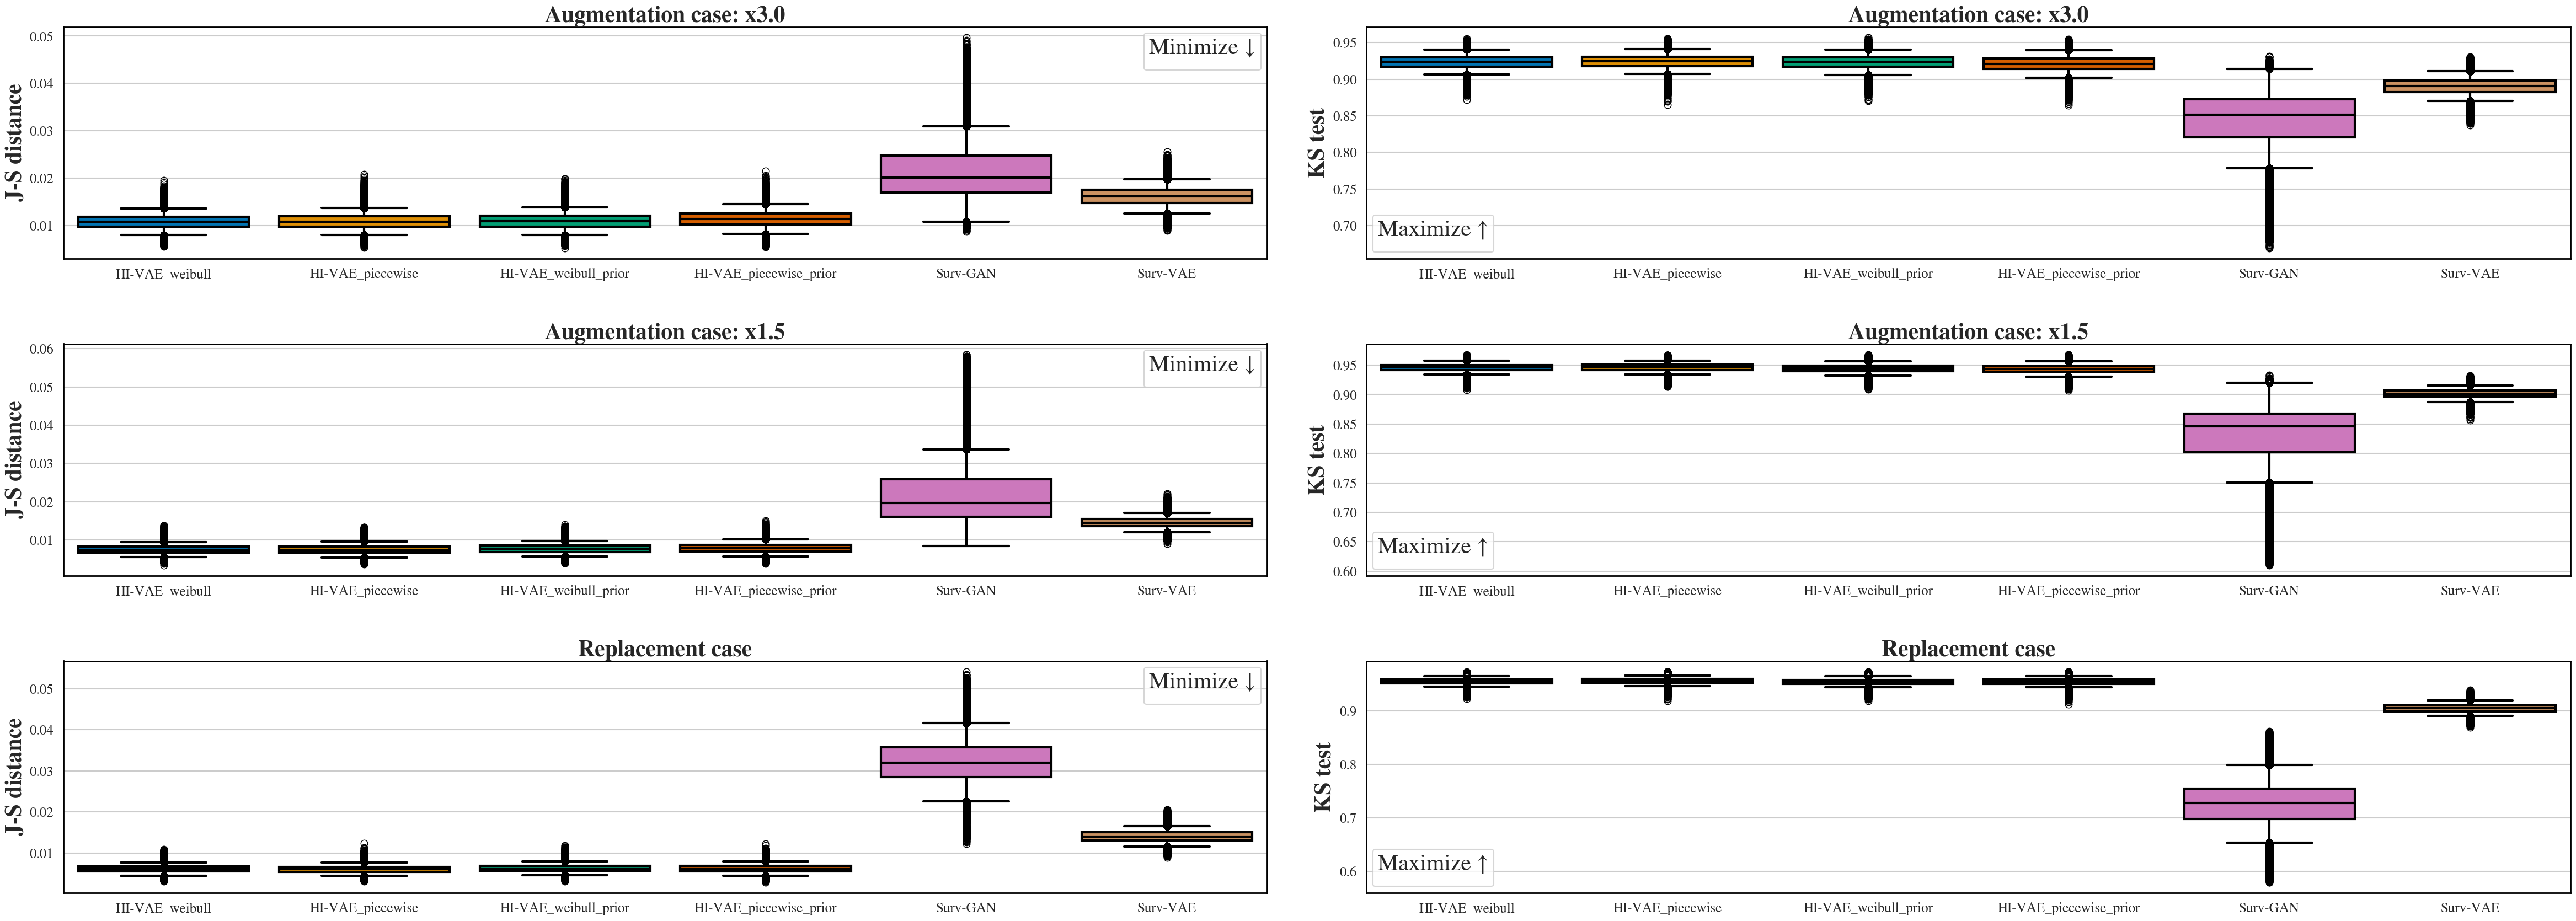

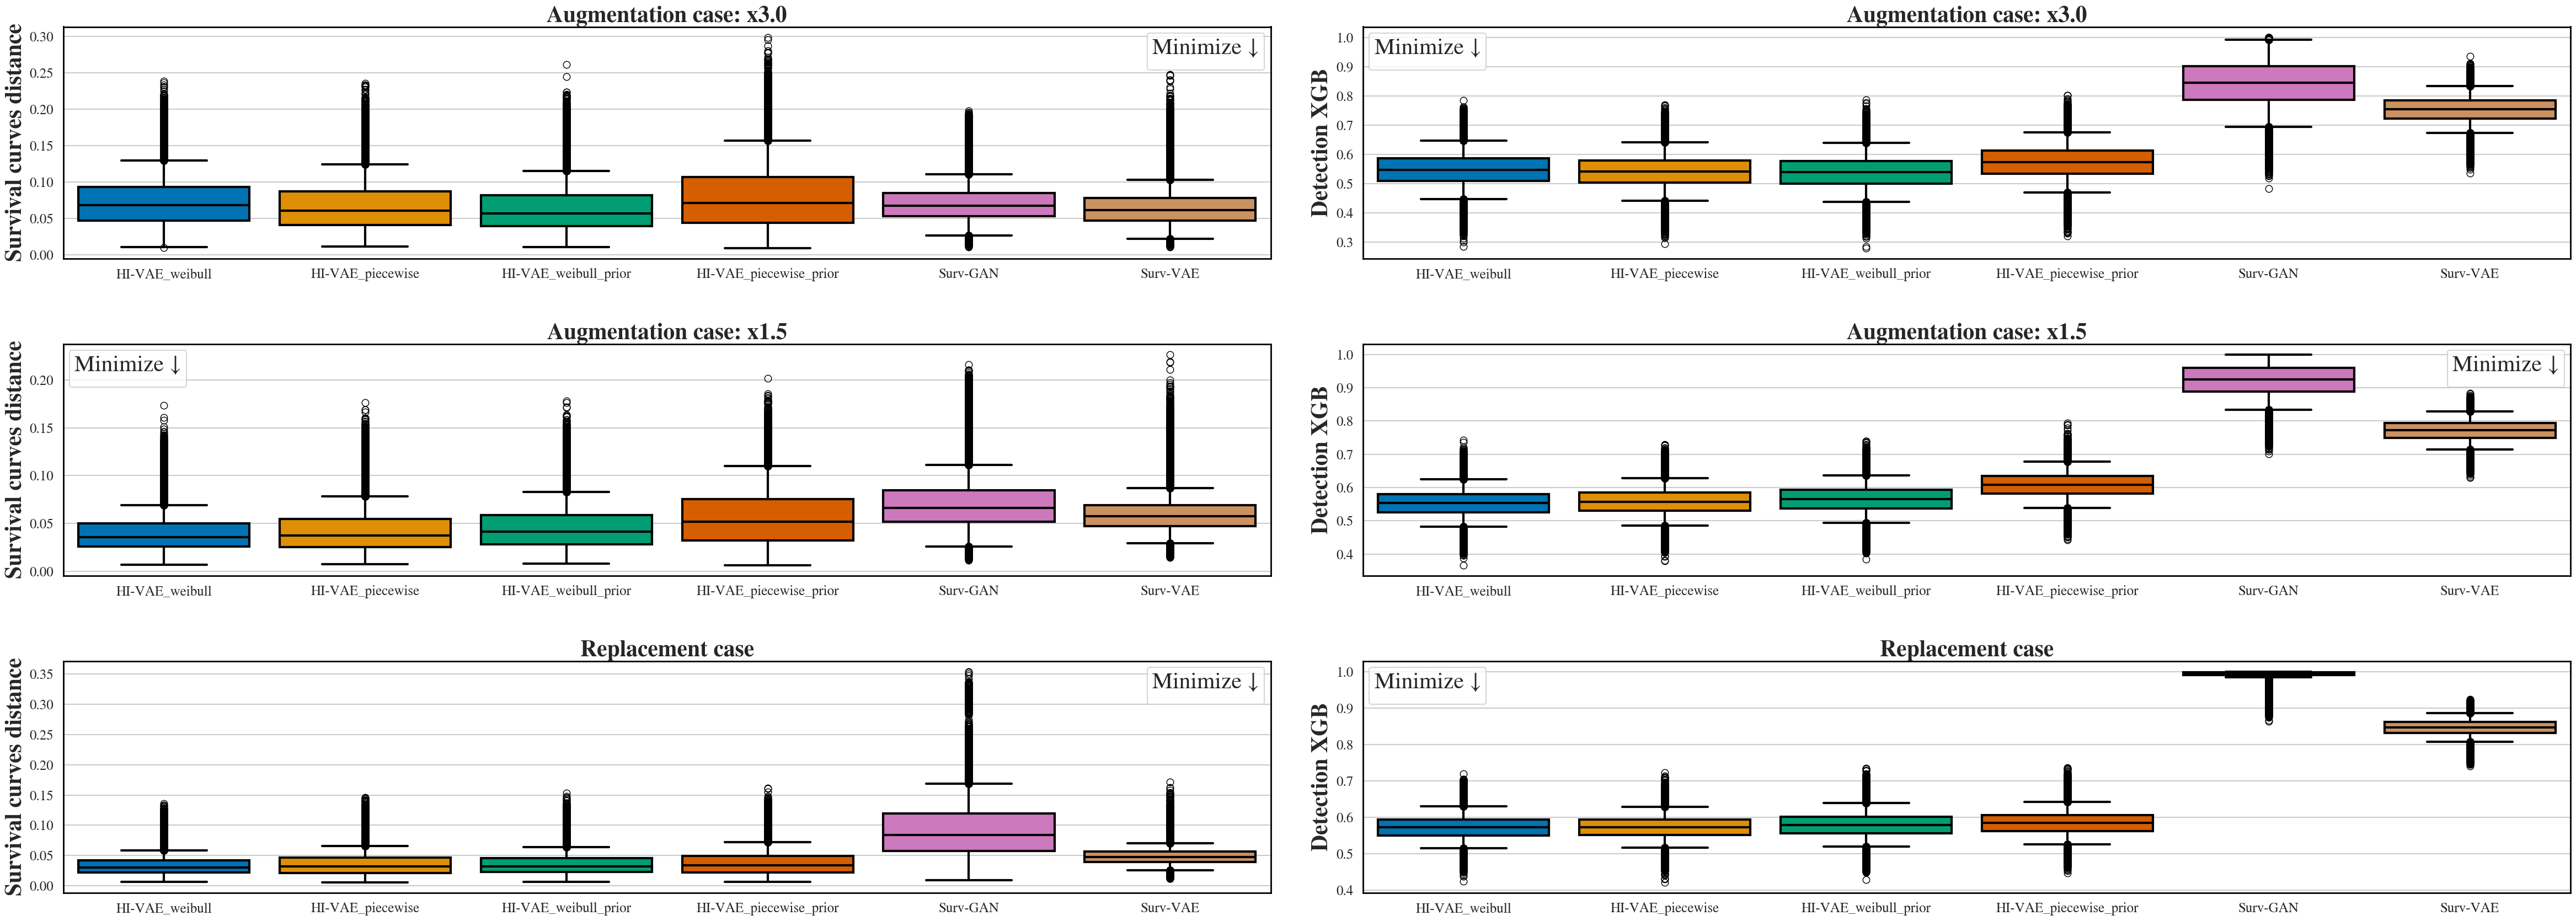

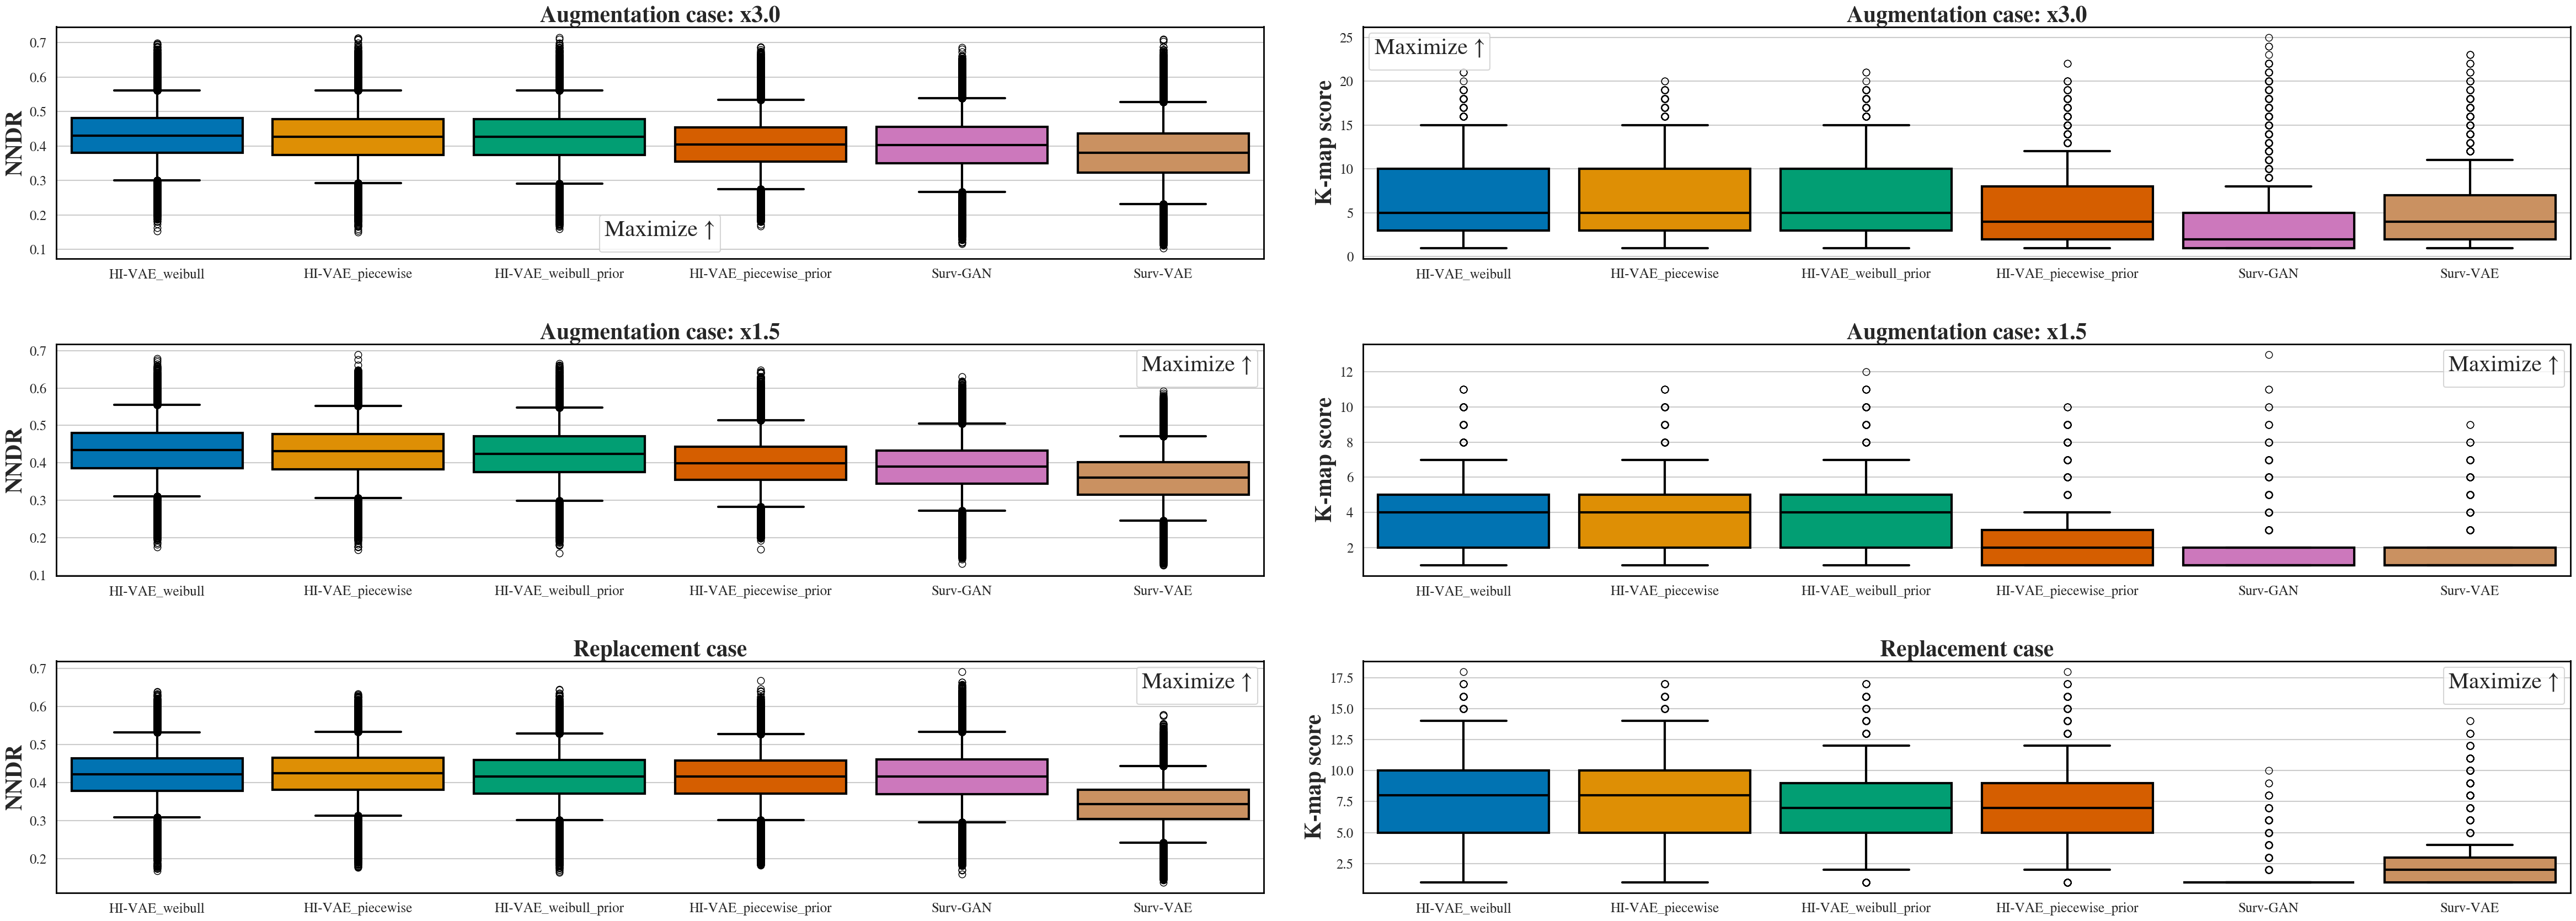

In [11]:
#### SYNTHCITY METRICS 
# metrics=[['J-S distance', "min"], ['KS test', "max"]]
metrics = [[['J-S distance', "min"], ['KS test', "max"]],
                [['Survival curves distance', "min"], ['Detection XGB', "min"]],
                [['NNDR', "max"], ['K-map score', "max"]]]

for sub_metrics in metrics:
    num_metrics = len(sub_metrics)
    n_learners = len(generators_sel)
    fig, axs = plt.subplots(len(aug_percs), num_metrics, figsize=(4 * num_metrics * n_learners, 6 * len(aug_percs)))

    if num_metrics == 1:
        axs = [axs]  # ensure axs is iterable

    for i, aug_perc in enumerate(aug_percs):
        # results_ext_control = results_control[results_control.aug_perc == aug_perc].copy(deep=True)
        results_ext_full = results_trainfull[results_trainfull.aug_perc == aug_perc].copy(deep=True)
        for j, ax in enumerate(axs[i]):
            # Format axis spines
            metric_name, opt = sub_metrics[j]
            metric_df = pd.DataFrame()
            for generator_name in generators_sel:
                metric_df = pd.concat([metric_df, pd.DataFrame(np.array([[generator_name] * results_ext_full.shape[0], 
                                                                results_ext_full[metric_name + "_" + generator_name]]).T,
                                                                columns=['generator', metric_name])])
            metric_df[metric_name] = np.float64(metric_df[metric_name].values)
            for spine in ax.spines.values():
                spine.set_linewidth(2)
                spine.set_edgecolor('black')

            sns.boxplot(data=metric_df, x='generator', y=metric_name, ax=ax,
                        linewidth = 3, saturation = 1, palette = 'colorblind', 
                        width = 1, gap = 0.15, whis = 0.8, linecolor="Black")
            ax.set_xlabel('')
            ax.set_ylabel(metric_name, fontsize=30, fontweight="semibold")
            # ax.set_title("Drop level {}".format(aug_perc), fontsize=20, fontweight="semibold")
            if i < len(aug_percs)-1:
                ax.set_title("Augmentation case: x{}".format(1/(aug_perc)), fontsize=30, fontweight="semibold")
            else: 
                ax.set_title("Replacement case", fontsize=30, fontweight="semibold")
            ax.tick_params(axis='x', labelsize=18)
            ax.tick_params(axis='y', labelsize=18)
            if opt == "max":
                ax.legend(title='Maximize \u2191', title_fontsize=30)
            else:
                ax.legend(title='Minimize \u2193', title_fontsize=30)
    plt.tight_layout(pad=3)
# plt.savefig("./dataset/" + dataset_name + "/results_synthetic_metrics_independent_n_samples_" + str(n_samples) + "n_features_bytype_" + str(n_features_bytype) + ".jpeg")

# Synthcity metrics: only best generated control dataset for each MC experiment

### Train on treated

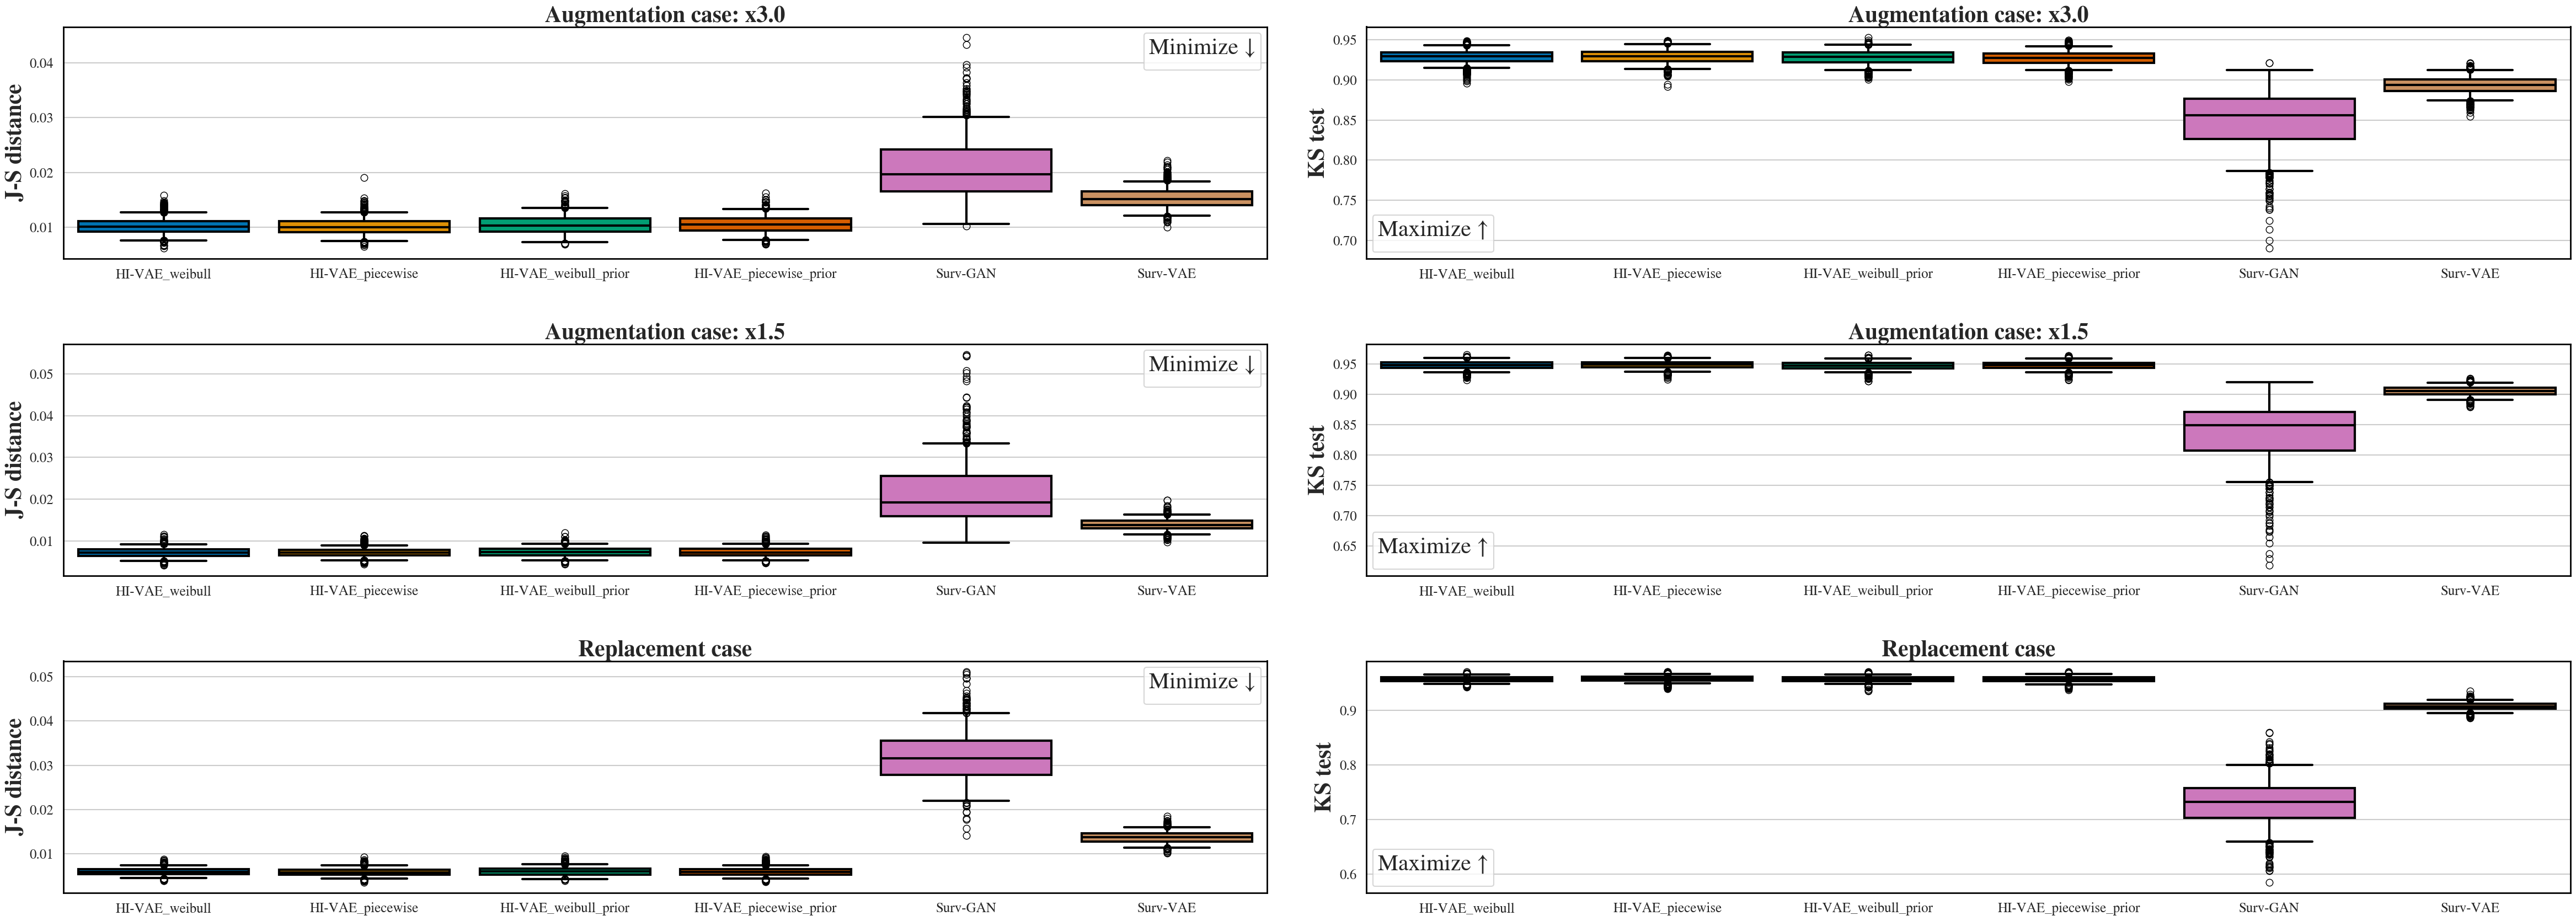

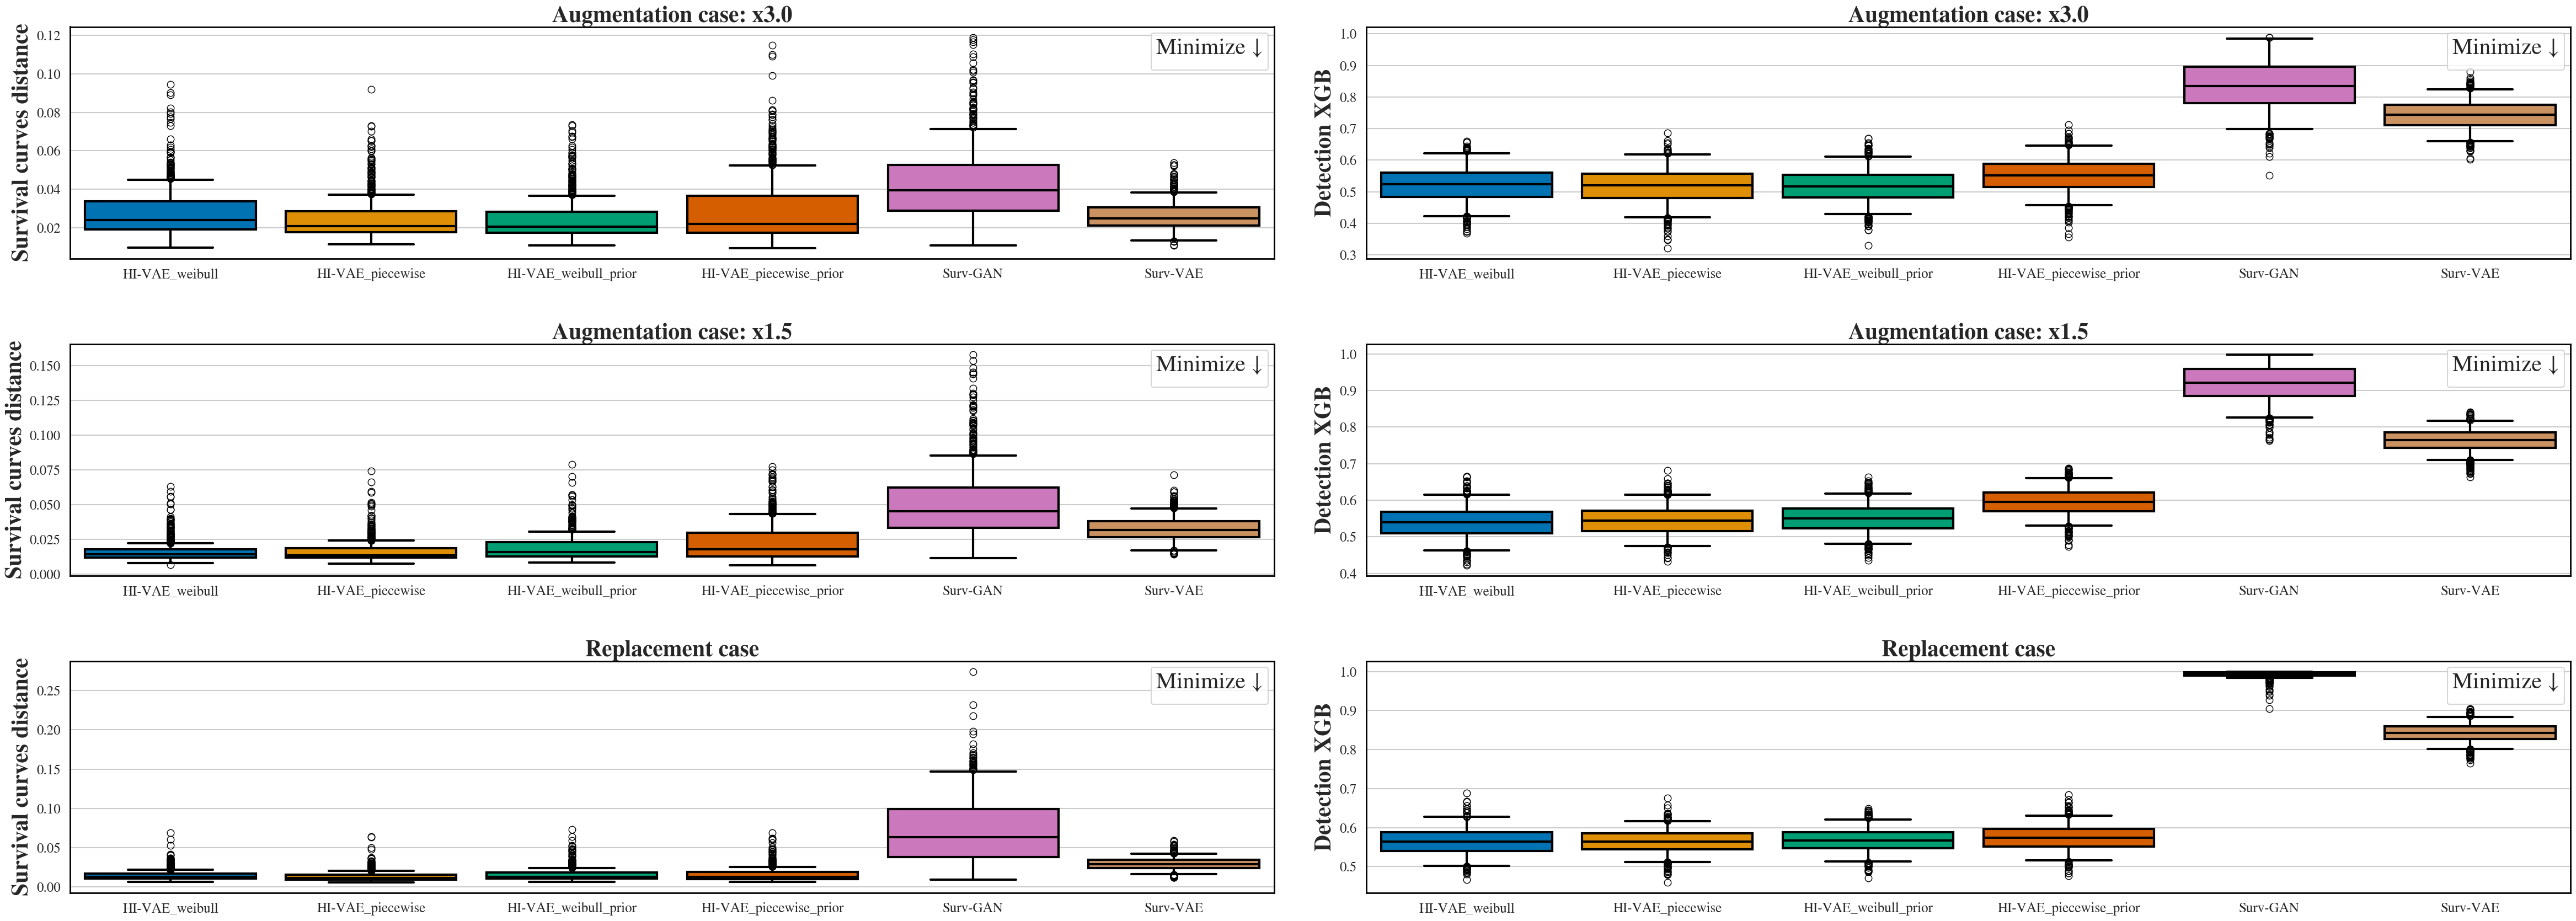

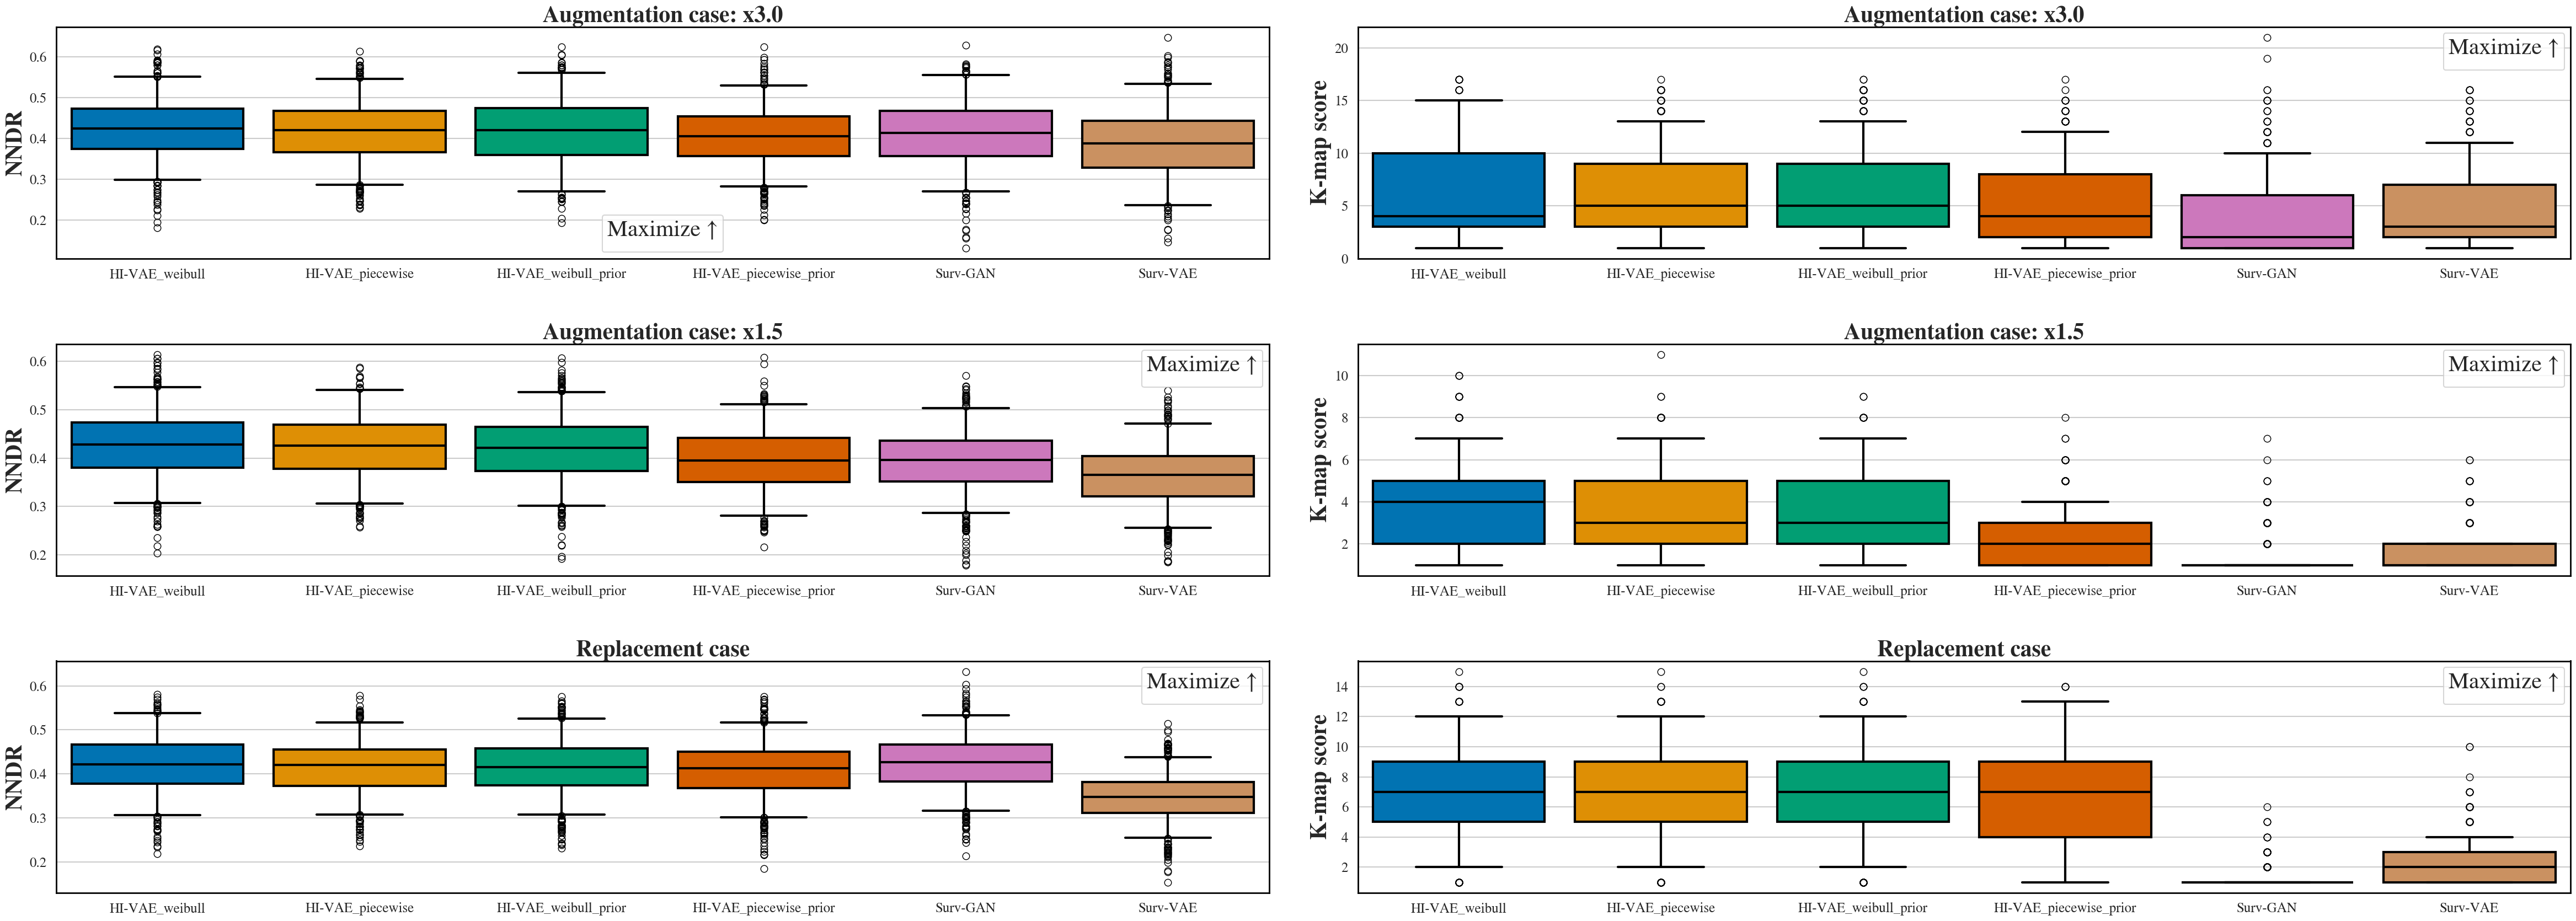

In [12]:
#### SYNTHCITY METRICS 
# metrics=[['J-S distance', "min"], ['KS test', "max"]]
metrics = [[['J-S distance', "min"], ['KS test', "max"]],
                [['Survival curves distance', "min"], ['Detection XGB', "min"]],
                [['NNDR', "max"], ['K-map score', "max"]]]

for sub_metrics in metrics:
    num_metrics = len(sub_metrics)
    n_learners = len(generators_sel)
    fig, axs = plt.subplots(len(aug_percs), num_metrics, figsize=(4 * num_metrics * n_learners, 6 * len(aug_percs)))

    if num_metrics == 1:
        axs = [axs]  # ensure axs is iterable

    for i, aug_perc in enumerate(aug_percs):
        results_ext_full = results_trainfull[results_trainfull.aug_perc == aug_perc].copy(deep=True)
        for j, ax in enumerate(axs[i]):
            # Format axis spines
            metric_name, opt = sub_metrics[j]
            metric_df = pd.DataFrame()
            XP_num = np.unique(results_ext_full["XP_num"].values)
            for m in XP_num:
                results_MC = results_ext_full[results_ext_full["XP_num"] == m]
                for generator_name in generators_sel:
                    best_metric = np.min(results_MC["Survival curves distance_" + generator_name].values)
                    results_MC_best = results_MC[results_MC["Survival curves distance_" + generator_name] == best_metric]
                    metric_df = pd.concat([metric_df, pd.DataFrame(np.array([[generator_name] * results_MC_best.shape[0], 
                                                                    results_MC_best[metric_name + "_" + generator_name]]).T,
                                                                    columns=['generator', metric_name])])
            metric_df[metric_name] = np.float64(metric_df[metric_name].values)
            for spine in ax.spines.values():
                spine.set_linewidth(2)
                spine.set_edgecolor('black')

            sns.boxplot(data=metric_df, x='generator', y=metric_name, ax=ax,
                        linewidth = 3, saturation = 1, palette = 'colorblind', 
                        width = 1, gap = 0.15, whis = 0.8, linecolor="Black")
            ax.set_xlabel('')
            ax.set_ylabel(metric_name, fontsize=30, fontweight="semibold")
            # ax.set_title("Drop level {}".format(aug_perc), fontsize=20, fontweight="semibold")
            if i < len(aug_percs)-1:
                ax.set_title("Augmentation case: x{}".format(1/(aug_perc)), fontsize=30, fontweight="semibold")
            else: 
                ax.set_title("Replacement case", fontsize=30, fontweight="semibold")
            ax.tick_params(axis='x', labelsize=18)
            ax.tick_params(axis='y', labelsize=18)
            if opt == "max":
                ax.legend(title='Maximize \u2191', title_fontsize=30)
            else:
                ax.legend(title='Minimize \u2193', title_fontsize=30)

    plt.tight_layout(pad=3)
# plt.savefig("./dataset/" + dataset_name + "/results_synthetic_metrics_independent_n_samples_" + str(n_samples) + "n_features_bytype_" + str(n_features_bytype) + ".jpeg")

# Other metrics

### Train on control + treated

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode
Augmentation case: x3.0


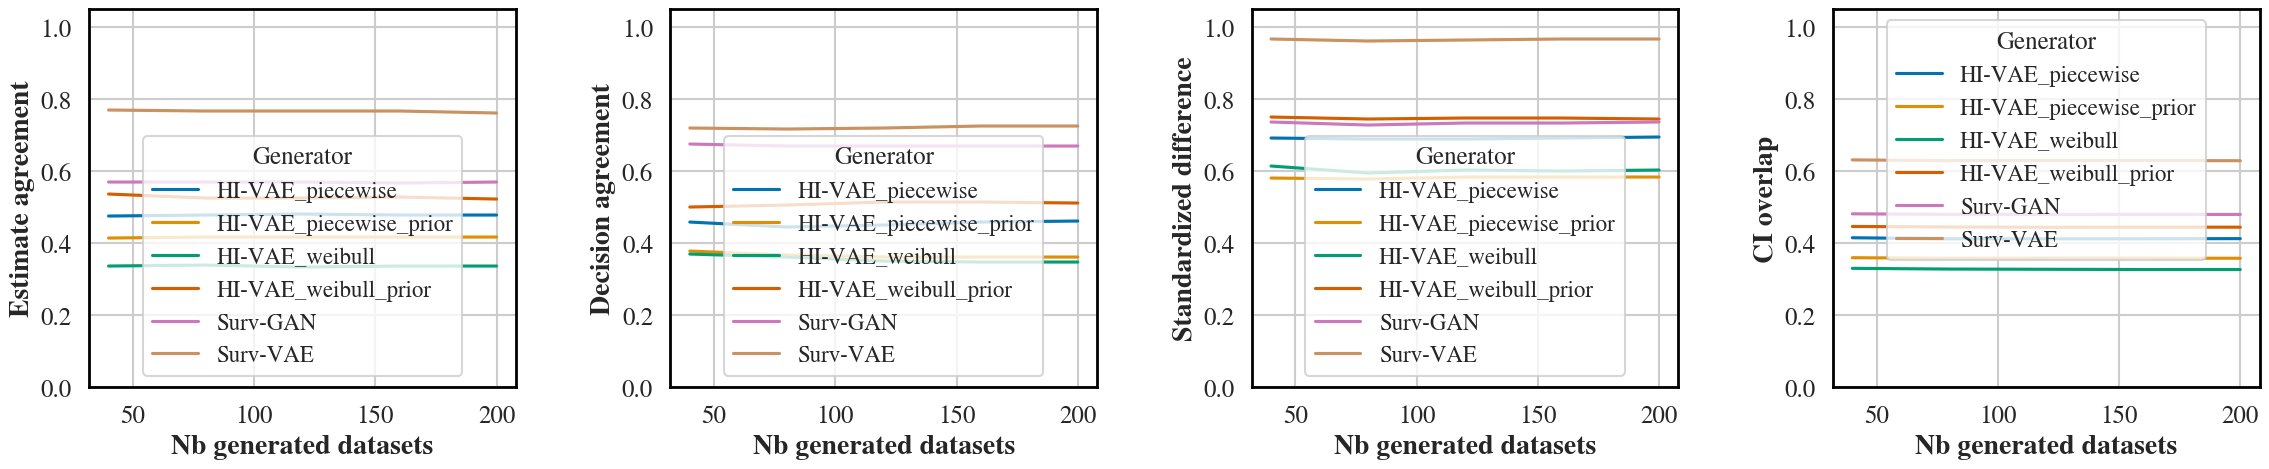

Augmentation case: x1.5


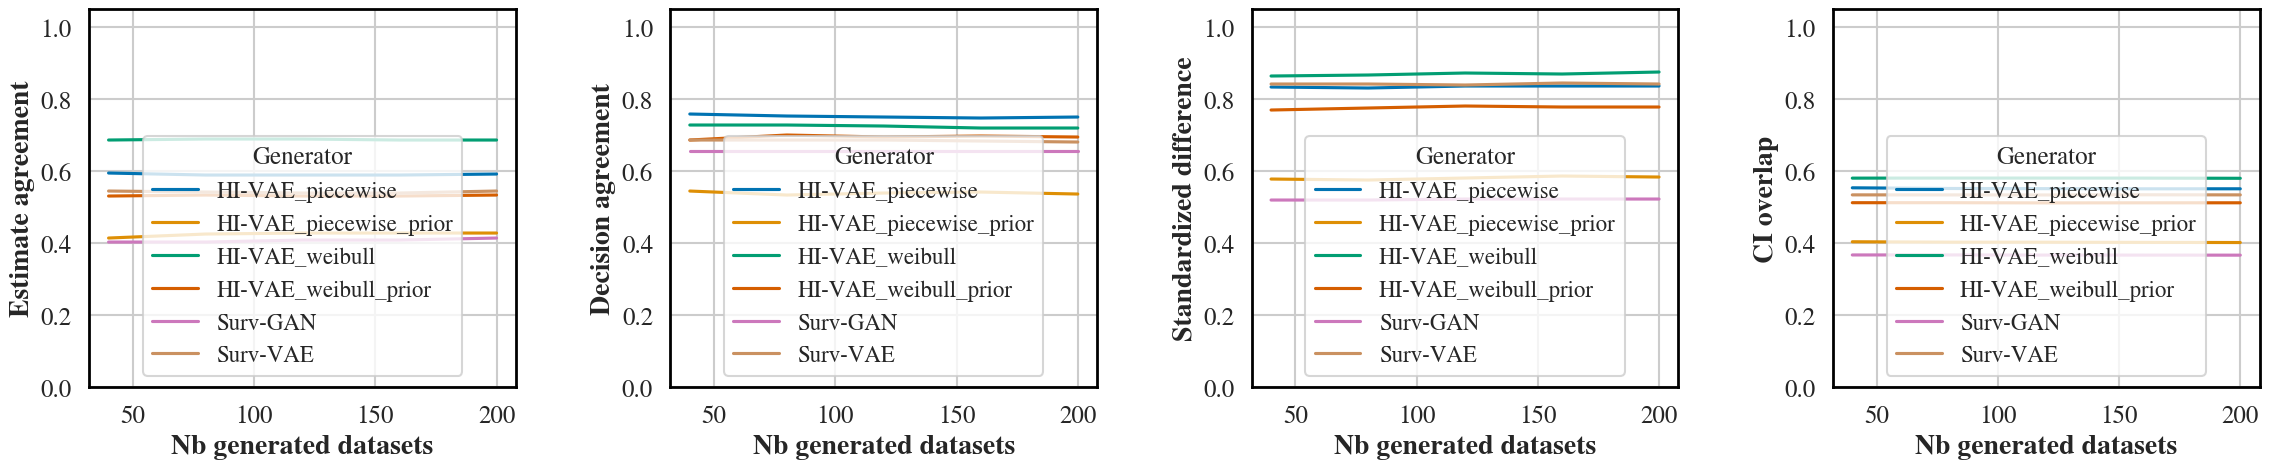

Replacement case


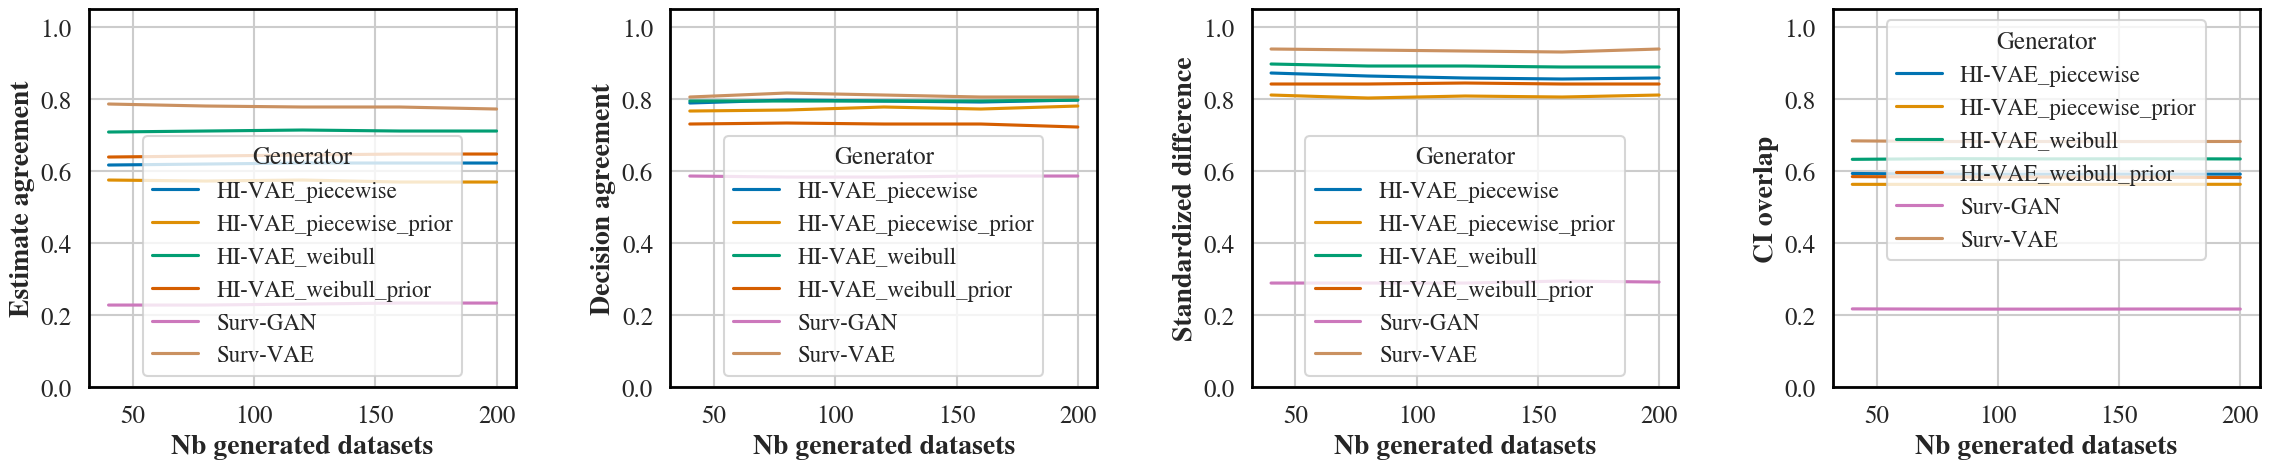

In [13]:
n_MC_exp = 60
from metrics import estimate_agreement, decision_agreement, standardized_difference, ci_overlap
columns = ['time', 'censor', 'treatment']

from visualization import visualize_replicability_perf
# score_df = pd.DataFrame(columns=["Generator", "Treatment_effect", "MC_exp", "Nb generated datasets", "Estimate agreement", "Decision agreement", "Standardized difference", "CI overlap"])
for i, aug_perc in enumerate(aug_percs):
    # results_ext_control = results_control[results_control.aug_perc == aug_perc].copy(deep=True)
    results_ext_full = results_trainfull[results_trainfull.aug_perc == aug_perc].copy(deep=True)
    score_df = pd.DataFrame(columns=["Generator", "Nb generated datasets", "Estimate agreement", "Decision agreement", "Standardized difference", "CI overlap"])
    for treatment_effect in treat_effects_trainfull:
        results_treat = results_ext_full[results_ext_full.H0_coef == treatment_effect]
        cox_init = results_treat[["est_cox_coef_init", "est_cox_coef_se_init"]].drop_duplicates().values
        for m in range(n_MC_exp):
            results_MC = results_treat[(results_treat[["est_cox_coef_init", "est_cox_coef_se_init"]] == cox_init[m]).all(axis=1)]
            coef_init, se_init = results_MC[["est_cox_coef_init", "est_cox_coef_se_init"]].drop_duplicates().values[0]
            ci_init = (coef_init - 1.96 * se_init, coef_init + 1.96 * se_init)

            for generator in generators_sel:
                coef_syn, se_syn = results_MC[["est_cox_coef_" + generator, "est_cox_coef_se_" + generator]].values.T
                max_len_samples = len(coef_syn)
                list_len_samples = np.arange(int(.2 * max_len_samples), max_len_samples, int(.2 * max_len_samples)).tolist()
                if max_len_samples not in list_len_samples:
                    list_len_samples += [max_len_samples]
                for j in list_len_samples:
                    coef_syn_, se_syn_ = np.array(coef_syn)[:j], np.array(se_syn)[:j]
                    coef_syn_mean = coef_syn_.mean()
                    var_syn_mean = (se_syn_**2).mean()
                    # imputation_var_syn = (1 / (len(coef_syn) - 1)) * np.sum([(coef_syn_ - coef_syn_mean)**2 for coef_syn_ in coef_syn])
                    # adjusted_var_syn = (imputation_var_syn / len(coef_syn)) + var_syn_mean
                    adjusted_var_syn = (1/j + 1) * var_syn_mean
                    ci_syn = (coef_syn_mean - 1.96 * np.sqrt(adjusted_var_syn), coef_syn_mean + 1.96 * np.sqrt(adjusted_var_syn))

                    res = [estimate_agreement(ci_init, coef_syn_mean),
                        decision_agreement(coef_init, ci_init, coef_syn_mean, ci_syn),
                        standardized_difference(coef_init, coef_syn_mean, se_init),
                        ci_overlap(ci_init, ci_syn)]

                    # score_df.loc[len(score_df)] = [generator, treatment_effect, m, j] + res
                    score_df.loc[len(score_df)] = [generator, j] + res
    if i < len(aug_percs)-1:
        print("Augmentation case: x{}".format(1/(aug_perc)))
    else:               
        print("Replacement case")
    visualize_replicability_perf(score_df.groupby(['Generator', 'Nb generated datasets'], as_index=False).mean())